# Project 3 Week 1

This project aims to teach some basic principles of *data analysis* particularly in the context of so-called *big data*. The particular problem to be addressed is one of **classification** where *instances* of 2 particular classes of data require separation. Whilst the specific problem deals with a problem in particle physics the methods and techniques employed can be applied, equally, to data from many sources, e.g. financial, medical, biosciences, socialology, etc.

The following plot was presented by the ATLAS collaboration at CERN as proof of the discovery of the Higgs Boson. It shows 2 classes of data, namely the *Higgs Boson signal* (red) and *backgrounds* (blue and purple). This was the result of a complicated analysis that looked for Higgs boson decay into 4 leptons. In such an analysis you want to reduce the *background* events to as few as possible whilst keeping as many *signal* events as possible.

<img src="Higgs.png" width=500>

A simple way of approaching such an analysis would be to find a set of *variables* or *parameters* that represent features in the 2 classes of events (signal and background), look for those variables/parameters which provide some *discrimination* between the 2 event classes and place cuts on those variables - keeping events that 'pass' the cuts and throwing the others away. This is a simple *linear cuts* based analysis. Usually the cut is placed on a variable/parameter in a way in which some *metric* is maximised or minimised.

## Cut placement and metrics

The plot below shows an idealised situation where a variable that represents some feature of 2 classes of events (**class A**=red, **class B**=green, **B** is to be kept) is plotted. In this case it is very clear to see by eye that, by placing a cut at around **x=1.0** and keeping all events to the right of that cut will keep **all** of the events in **class B** and discard **all** of the events in **class A**.

<img src="ideal.png" width=500>

In reality it is highly unusual (impossible?) to find a variable with such a high *discriminating power*, the following plot is more realistic and is one of those (**nue**) that you will be considering today.

<img src="nue.png" width=500>

This variable clearly gives some *discrimination* between the 2 event classes. Even by eye it can be seen that cutting at a value of at around **2000** for example, and keeping all events to the right of that cut, will significantly reduce the number of **class A** events whilst keeping *most* (not all) of the **class B** events. However, we need to be more methodical than just placing a cut by eye, so typically a suitable *metric* is used.

In this project we will seek to maximise the product **efficiency ($\epsilon$) $\times$ purity($\rho$)** where these are defined as:

$$ \epsilon = \frac{\rm{Number\:of\:A\:events\:kept}}{\rm{Total\:number\:of\:A\:events}} $$

$$ \rho = \frac{\rm{Number\:of\:A\:events\:kept}}{\rm{(Number\:of\:A\:events\:+\:Number\:of\:B\:events)\:kept}} $$

By calculating the product of $\epsilon\times\rho$ as a function of each variable in question it will be possible to determine exactly where the cut should be placed in order to optimise the cut. **Note:** care is needed here, the calculation is done differently if the cut is to keep events to the *left* of the cut or the *right* of the cut. Examples of $\epsilon\times\rho$ for a cut keeping everything to the left (1st plot) or keeping everything to the right (2nd plot) of the **nue** variable above are given below.

<img src="nue_above.png" width=500>

<img src="nue_below.png" width=500>

The first plot basically tells you that there is no good cut which keeps everything to the left of the cut but a cut at around 2000 (the exact value can be determined exactly from the data which has made the $\epsilon\times\rho$ curve) will be effective and efficient. 

Where event **classification** takes place it is usual practise to use *training samples* to determine where the cuts are placed and, once the cuts are optimised, to run the cuts on a true set of data.

In principle, in the case of a *linear cuts analaysis* the correct way to proceed is as follows:

* choose a cut that has known discriminating power
* optimise the cut position(s) using a suitable metric
* apply the cut to the training data sets
* move onto the next cut and repeat

In other words, not all cuts are optimised at the same time. It is possible to optimise a set of cuts and apply them to the data all at the same time however this approach will almost certainly give you a worse result.

## Neutrino events

In this project we will perform an analysis of events produced when a neutrino interacts with a nucleon. There are a number of different *interaction types* that can take place. The generic Feynman diagrams for these interactions are given below.

<img src="nuint.png" width=500>

The challenge here is to select the so-called *RES* (resonant production) class of events from all other event types whilst maximising the product **efficiency ($\epsilon$) $\times$ purity($\rho$)**. Note that some variables may benefit from 2 cuts being placed (one in each "direction").
 

## Week 1 Tasks

Inside your Project3 folder you will find a sub-folder called **data** (to avoid overwriting it is best to leave the data there), the folder contains 4 files called *signal_training.dat*, *background_training.dat*, *signal_data.dat*, *background_data.dat*. The first 2 files correspond to the training samples for the Class A (RES) events and Class B (others) events respectively. There several variables that describe the events in each file these are described in the Appendix at the bottom of these notes.

Note that, in some cases a variable is not defined for a particular event, in that case, the figure -999.0 is entered instead.  The attached `Python` script will read the *training* data into a suitable `Python` dictionary to get you started, it also changes all instances of **-999.9** to **"None"**, you can, of course, uncomment this.

The data and training sets each have 10000 events in them.

1. Start off with the training sets only
2. First inspect all 19 variables by eye and/or with the use of the ($\epsilon\times\rho$) metric. 5 of them are clearly poor discriminators and can be discarded from further consideration. 10 have got some good level of discriminating power and should definitely be kept for the next stage. 4 have intermediate discrimination.
3. For the good or good/intermediate discriminators then you can proceed in one of the two ways as discussed above, i.e. optimise all cuts at the same time or one at a time. Your mark from this part of the project will depend, in part, on how well your final cut selection performs. 

Your final event selection will be a series of variables and cut values. The following should be clear in your code:

1. which variables you have used to cut on
2. the cut value(s) for each variable
3. the order the cuts are applied in (where relevant)

The attached `Python` script will read the *training* data into a suitable `Python` dictionary to get you started.

In [1]:
import numpy as np

# Function to build event dictionaries from a file
def BuildEventList(efile):

    # Read variable names from tableformat list
    tableformat = open("/home/user/data/tableformat.dat","r")
    varnames = tableformat.readline().split()

    # Load numpy array
    npevents = np.loadtxt(efile)

    # Event List
    eventlist = []

    # Loop over numpy array and build event objects
    for iev, ev in enumerate(npevents):
        
        # Building events as dictionaries for ease of use
        # Note: This is very inefficient when handling large data samples
        #       but easy to use for now.
        event = {}

        # Loop over variable names given in table format and add as entry
        for jvar, var in enumerate(varnames):

            # Unfilled variables are saved in the file as -999.9
            # replace these with NONE so its clear (NB: this is optional)
            if ev[jvar] == -999.9:
                event[var] = None
            else:
                event[var] = ev[jvar]

        # Push event dictionary into list
        eventlist.append(event)

        # Print out
        if iev % 1000 == 0:
            print ("Built",iev," event dictionaries. Event",iev," has nue=", event["nue"])

    return eventlist

# Build Training Event Samples
signal_training = BuildEventList("/home/user/data/signal_training.dat")
background_training = BuildEventList("/home/user/data/background_training.dat")

# Loop over all events and print some variables from every 100th event
varname = "ntracks"
for iev, ev in enumerate(signal_training):
    if iev % 100 == 0:
        print ("SIG Event", iev, ": muonmom =", ev["muonmom"], ",", varname, " =", ev[varname])

for iev, ev in enumerate(background_training):
    if iev % 100 == 0:
        print ("BKG Event ", iev, ": muonmom =", ev["muonmom"], ",", varname, " =", ev[varname])

Built 0  event dictionaries. Event 0  has nue= 12359.4568403
Built 1000  event dictionaries. Event 1000  has nue= 1481.38114658
Built 2000  event dictionaries. Event 2000  has nue= 2926.3181487
Built 3000  event dictionaries. Event 3000  has nue= 6637.02040283
Built 4000  event dictionaries. Event 4000  has nue= 2133.9351837
Built 5000  event dictionaries. Event 5000  has nue= 1804.49391554
Built 6000  event dictionaries. Event 6000  has nue= 6039.06956359
Built 7000  event dictionaries. Event 7000  has nue= 6661.91921479
Built 8000  event dictionaries. Event 8000  has nue= 1387.25393055
Built 9000  event dictionaries. Event 9000  has nue= 4415.14211858


Built 0  event dictionaries. Event 0  has nue= -495.042051487
Built 1000  event dictionaries. Event 1000  has nue= 1243.33360802
Built 2000  event dictionaries. Event 2000  has nue= 777.611376064
Built 3000  event dictionaries. Event 3000  has nue= 133.234581286
Built 4000  event dictionaries. Event 4000  has nue= -331.649903052
Built 5000  event dictionaries. Event 5000  has nue= 591.254968925
Built 6000  event dictionaries. Event 6000  has nue= 1777.6238274
Built 7000  event dictionaries. Event 7000  has nue= 821.429814313
Built 8000  event dictionaries. Event 8000  has nue= 2035.01020193
Built 9000  event dictionaries. Event 9000  has nue= 1225.75576429
SIG Event 0 : muonmom = 3825.81355271 , ntracks  = 3.0
SIG Event 100 : muonmom = 4107.69749699 , ntracks  = 2.0
SIG Event 200 : muonmom = 3237.49234153 , ntracks  = 1.0
SIG Event 300 : muonmom = 826.322180507 , ntracks  = 2.0
SIG Event 400 : muonmom = 899.997936882 , ntracks  = 1.0
SIG Event 500 : muonmom = 160.946911015 , ntracks  =

0.0
BKG Event  900 : muonmom = 172.715935508 , ntracks  = 0.0
BKG Event  1000 : muonmom = 1017.96703957 , ntracks  = 0.0
BKG Event  1100 : muonmom = 939.150112658 , ntracks  = 0.0
BKG Event  1200 : muonmom = 522.202533259 , ntracks  = 0.0
BKG Event  1300 : muonmom = 99.5510891844 , ntracks  = 0.0
BKG Event  1400 : muonmom = 757.970871252 , ntracks  = 0.0
BKG Event  1500 : muonmom = 655.71216273 , ntracks  = 1.0
BKG Event  1600 : muonmom = 3705.16428908 , ntracks  = 1.0
BKG Event  1700 : muonmom = 376.283931768 , ntracks  = 1.0
BKG Event  1800 : muonmom = 268.506954851 , ntracks  = 0.0
BKG Event  1900 : muonmom = 464.278015079 , ntracks  = 0.0
BKG Event  2000 : muonmom = 646.648448718 , ntracks  = 0.0
BKG Event  2100 : muonmom = 717.129813708 , ntracks  = 1.0
BKG Event  2200 : muonmom = 373.87768491 , ntracks  = 0.0
BKG Event  2300 : muonmom = 265.921380734 , ntracks  = 0.0
BKG Event  2400 : muonmom = 751.441298322 , ntracks  = 0.0
BKG Event  2500 : muonmom = 637.293670656 , ntracks  = 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

nue=np.zeros((10000,2))             #Creating 2D arrays to store the signal and background data of all the different discriminators
effpullx=np.zeros((10000,2))
negpionmom=np.zeros((10000,2))
piontotale=np.zeros((10000,2))
ntracks=np.zeros((10000,2))
fgdcos=np.zeros((10000,2))
pospions=np.zeros((10000,2))
pospiontheta=np.zeros((10000,2))
pi0elpull=np.zeros((10000,2))
pospionmom=np.zeros((10000,2))
efftime=np.zeros((10000,2))
energybalance=np.zeros((10000,2))
muonmom=np.zeros((10000,2))
effpully=np.zeros((10000,2))
pospionz=np.zeros((10000,2))
muonpos=np.zeros((10000,2))
muoncos=np.zeros((10000,2))
muonpull=np.zeros((10000,2))
muonz=np.zeros((10000,2))

for i in range(0,10000):                                        #For loop to append all the signal and background data to the arrays from the lists of dictionaries
    nue[i,0]=signal_training[i].get('nue')                      #Using the get function with dictionaries
    nue[i,1]=background_training[i].get('nue')
    effpullx[i,0]=signal_training[i].get('effpullx')
    effpullx[i,1]=background_training[i].get('effpullx')
    negpionmom[i,0]=signal_training[i].get('negpionmom')
    negpionmom[i,1]=background_training[i].get('negpionmom')
    piontotale[i,0]=signal_training[i].get('piontotale')
    piontotale[i,1]=background_training[i].get('piontotale')
    ntracks[i,0]=signal_training[i].get('ntracks')
    ntracks[i,1]=background_training[i].get('ntracks')
    fgdcos[i,0]=signal_training[i].get('fgdcos')
    fgdcos[i,1]=background_training[i].get('fgdcos')
    pospions[i,0]=signal_training[i].get('pospions')
    pospions[i,1]=background_training[i].get('pospions')
    pospiontheta[i,0]=signal_training[i].get('pospiontheta')
    pospiontheta[i,1]=background_training[i].get('pospiontheta')
    pi0elpull[i,0]=signal_training[i].get('pi0elpull')
    pi0elpull[i,1]=background_training[i].get('pi0elpull')
    pospionmom[i,0]=signal_training[i].get('pospionmom')
    pospionmom[i,1]=background_training[i].get('pospionmom')
    efftime[i,0]=signal_training[i].get('efftime')
    efftime[i,1]=background_training[i].get('efftime')
    energybalance[i,0]=signal_training[i].get('energybalance')
    energybalance[i,1]=background_training[i].get('energybalance')
    muonmom[i,0]=signal_training[i].get('muonmom')
    muonmom[i,1]=background_training[i].get('muonmom')
    effpully[i,0]=signal_training[i].get('effpully')
    effpully[i,1]=background_training[i].get('effpully')
    pospionz[i,0]=signal_training[i].get('pospionz')
    pospionz[i,1]=background_training[i].get('pospionz')
    muonpos[i,0]=signal_training[i].get('muonpos')
    muonpos[i,1]=background_training[i].get('muonpos')
    muoncos[i,0]=signal_training[i].get('muoncos')
    muoncos[i,1]=background_training[i].get('muoncos')
    muonpull[i,0]=signal_training[i].get('muonpull')
    muonpull[i,1]=background_training[i].get('muonpull')
    muonz[i,0]=signal_training[i].get('muonz')
    muonz[i,1]=background_training[i].get('muonz')


In [3]:
def minimum(array):                                             #Functions to find the minimum and maximum values of the arrays irrespective of nan values
    x=(min((np.nanmin(array[:,0]),np.nanmin(array[:,1]))))
    return x

def maximum(array):
    y=(max((np.nanmax(array[:,0]),np.nanmax(array[:,1]))))
    return y

def safe_div(x,y):                                             #Function to fix zero division error when calculating purity, replaces error with a zero, causes spikes in                                                                #the graphs
    if y == 0:
        return 0
    return x / y

def master_cut(array):                                                  #Fucntion to calculate efficiency, purity and the product of them for each array and plot graphs                                                                         where data is less and greater than the 
    trial=np.linspace(minimum(array),maximum(array),10000)              #linspace values generated.
    trial=trial.tolist()
    eff_1,eff_2,pur_1,pur_2,product_1,product_2=[],[],[],[],[],[]
    for i in range(len(trial)):
        less_signal = array[:,0][np.where(array[:,0] < trial[i])]      #Creates a list of values for which the values in the input array are less or greater than the 
        greater_signal = array[:,0][np.where(array[:,0] > trial[i])]    #value in the linspace
        less_background = array[:,1][np.where(array[:,1] < trial[i])]
        greater_background = array[:,1][np.where(array[:,1] > trial[i])]
        less1=len(less_signal)                                                #Taking the length of the lists created to use in the expressions for efficiency and purity
        greater1=len(greater_signal)
        less2=len(less_background)
        greater2=len(greater_background)
        eff1=less1/(np.count_nonzero(~np.isnan(array[:,0])))        #Calculating efficiency to the left
        eff2=greater1/(np.count_nonzero(~np.isnan(array[:,0])))     #Calculating efficiency to the right
        eff_1.append(eff1)
        eff_2.append(eff2)
        pur1=safe_div(less1,(less1 + less2))             #Calculating purity to the left
        pur2=safe_div(greater1,(greater1 + greater2))    #Calculating purtiy to the right
        pur_1.append(pur1)
        pur_2.append(pur2)
        p1=eff_1[i]*pur_1[i]          #Calculating eff*purity to the left
        p2=eff_2[i]*pur_2[i]          #Calculating eff*purity to the right
        product_1.append(p1)
        product_2.append(p2)

    ind1=product_1.index(max(product_1))     #Finding the index of the maximum value for eff*pur in their list of values
    ind2=product_2.index(max(product_2))

    plt.plot(eff_1,label='Efficiency')
    plt.plot(pur_1,label='Purity')
    plt.plot(product_1,label='Eff*Pur')
    plt.legend()
    plt.title('Best cut point to the left is '+str(trial[ind1]))    #Using the previously worked out index to find the corresponding value from the linspace data
    plt.show()                                                      #This is the best value to cut on either to the left or right of the data

    plt.plot(eff_2,label='Efficiency')
    plt.plot(pur_2,label='Purity')
    plt.plot(product_2,label='Eff*Pur')
    plt.legend()
    plt.title('Best cut point to the right is '+str(trial[ind2]))
    plt.show()

/ext/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/ext/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


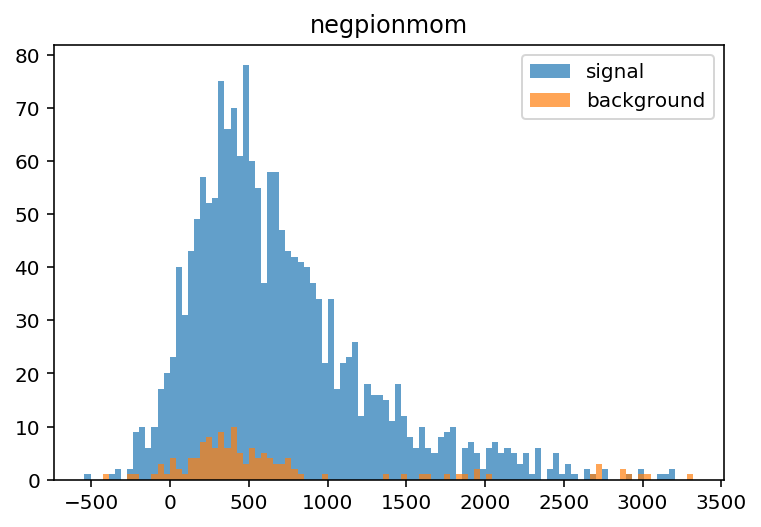

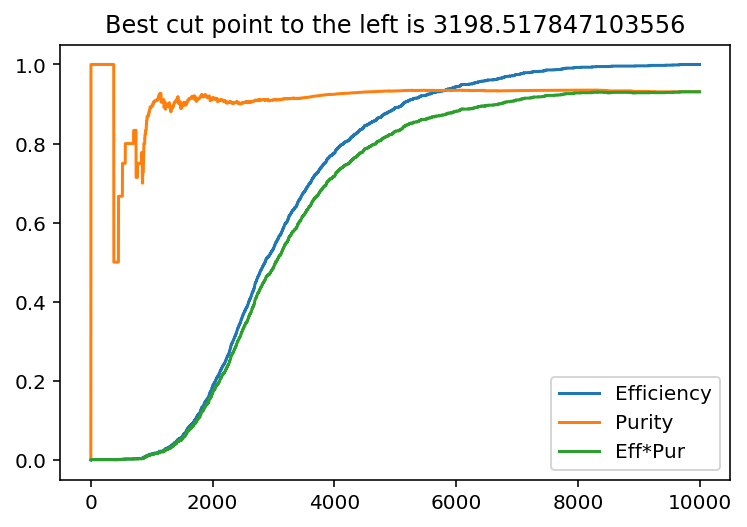

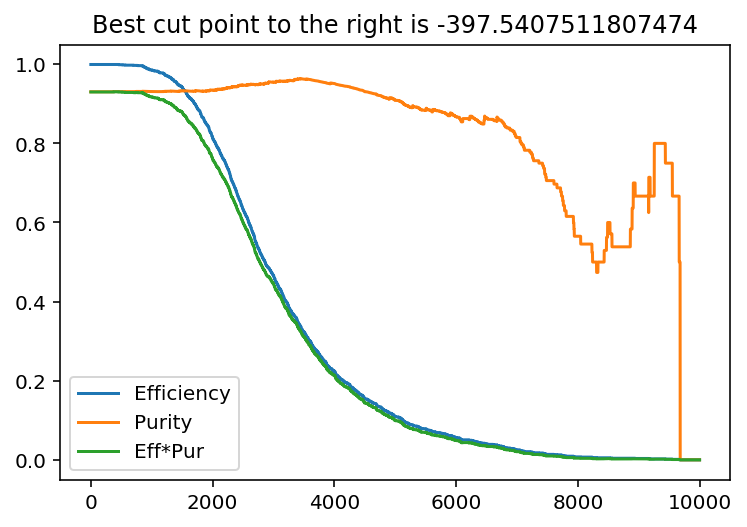

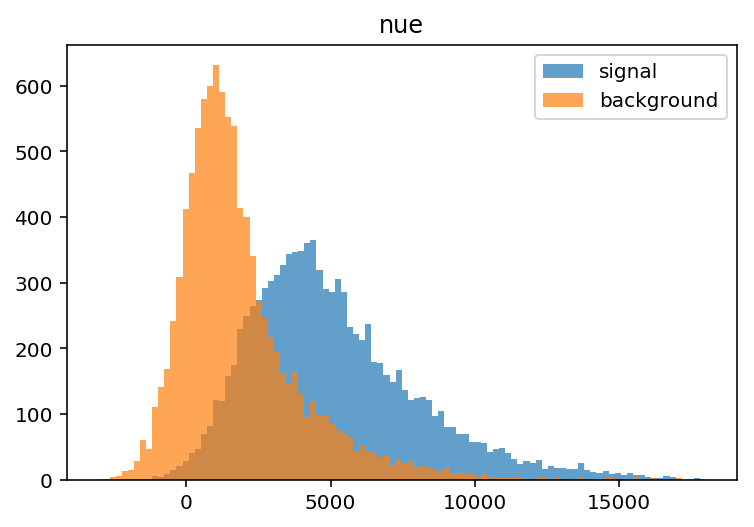

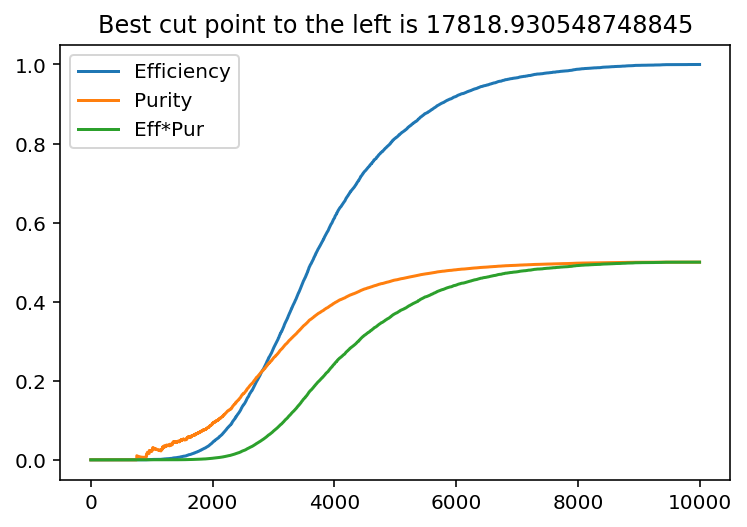

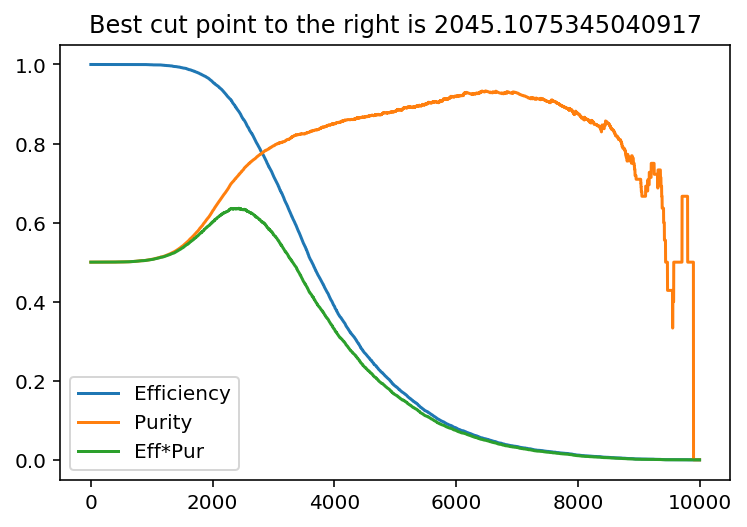

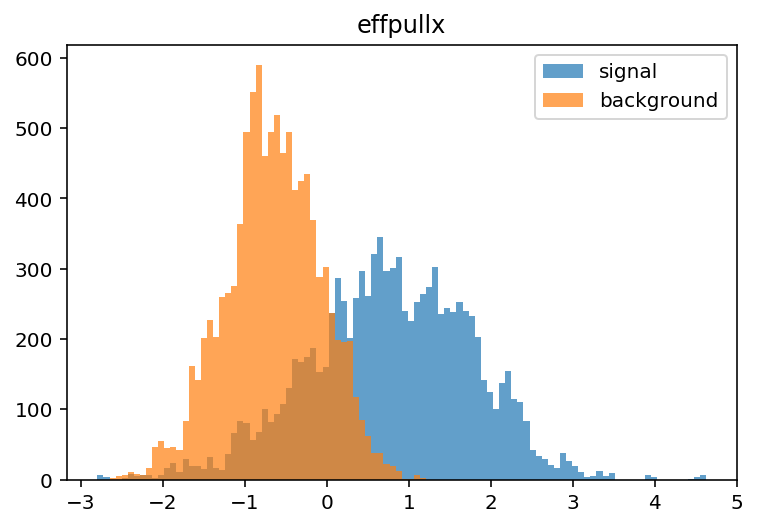

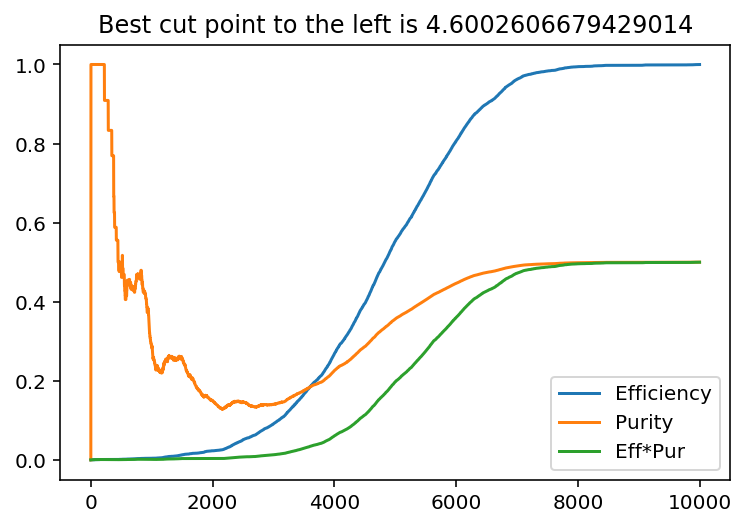

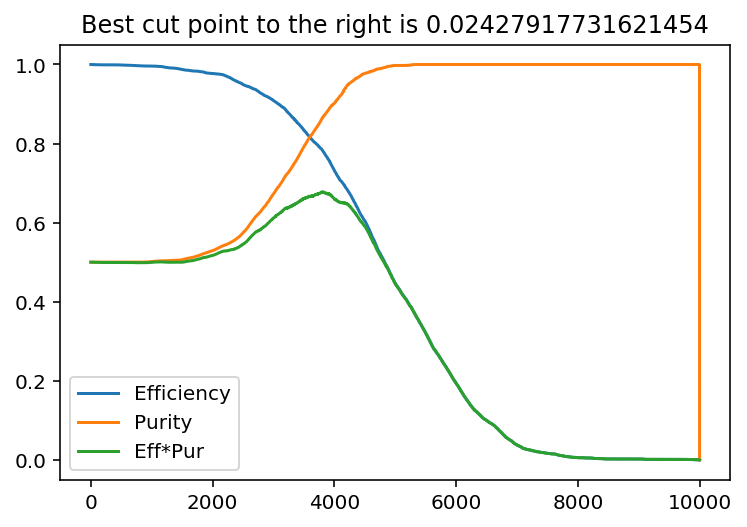

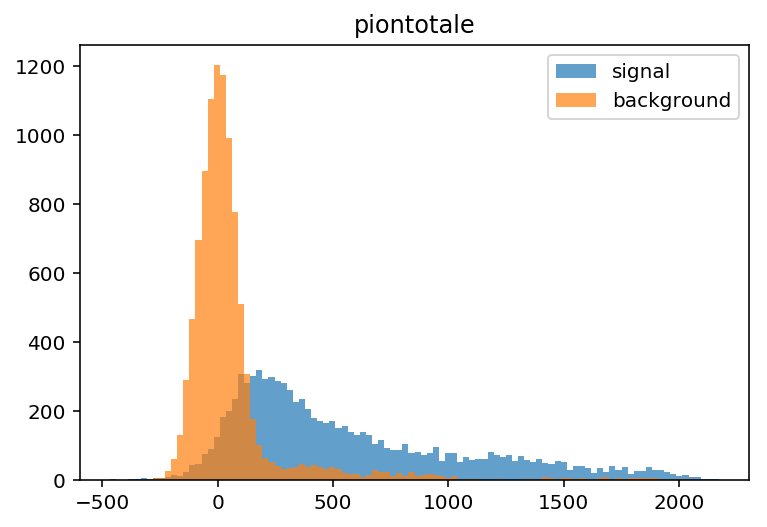

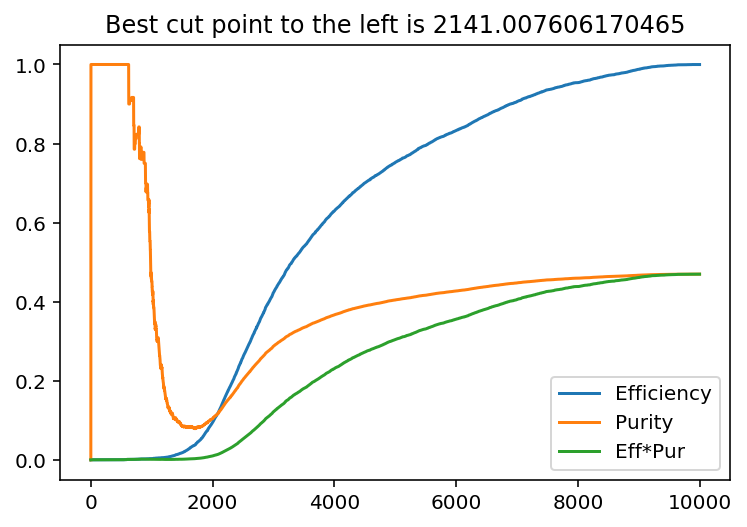

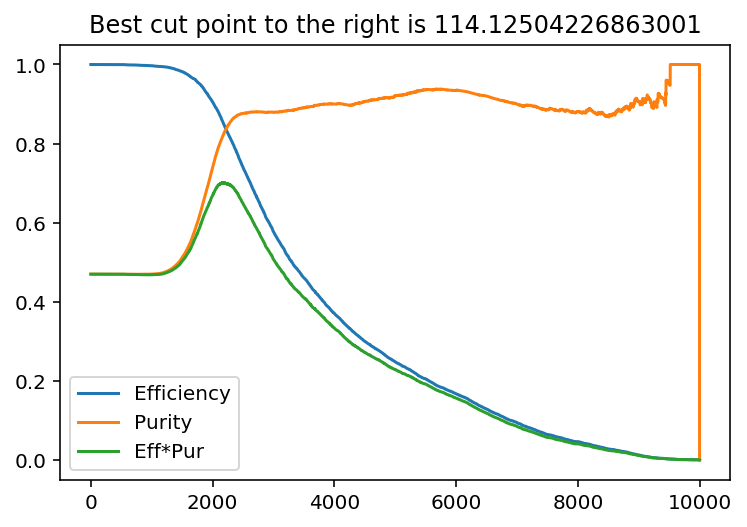

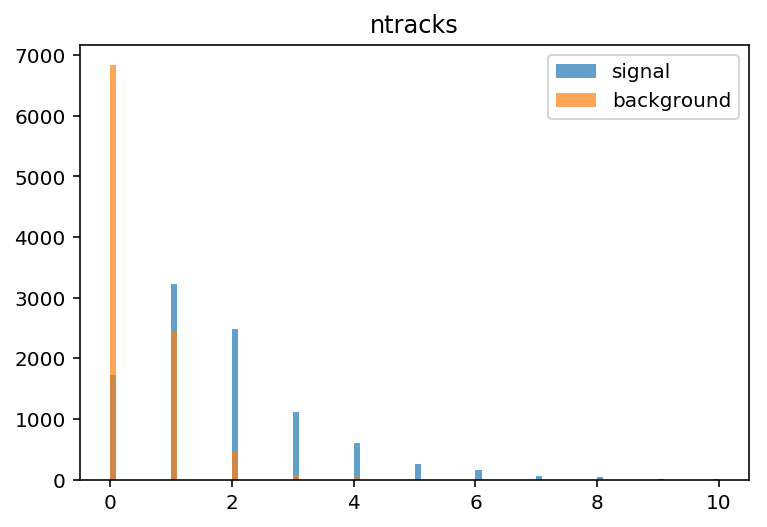

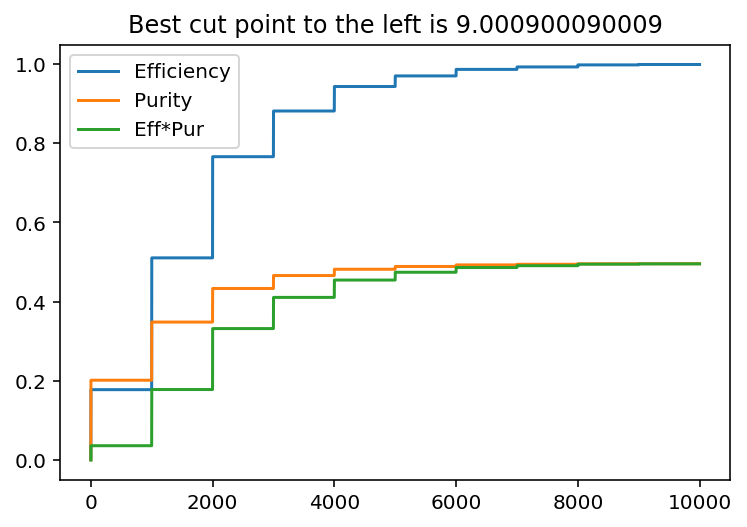

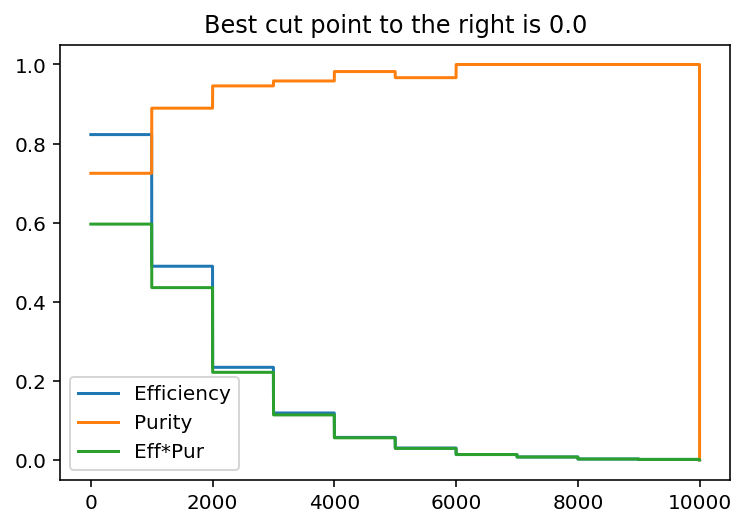

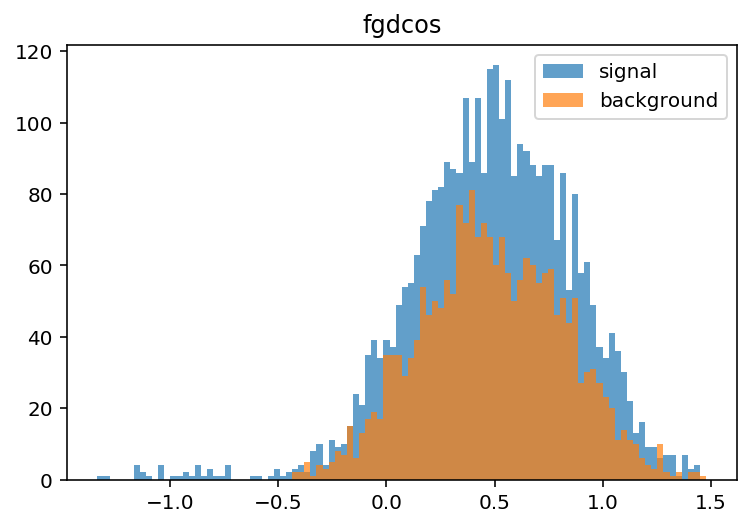

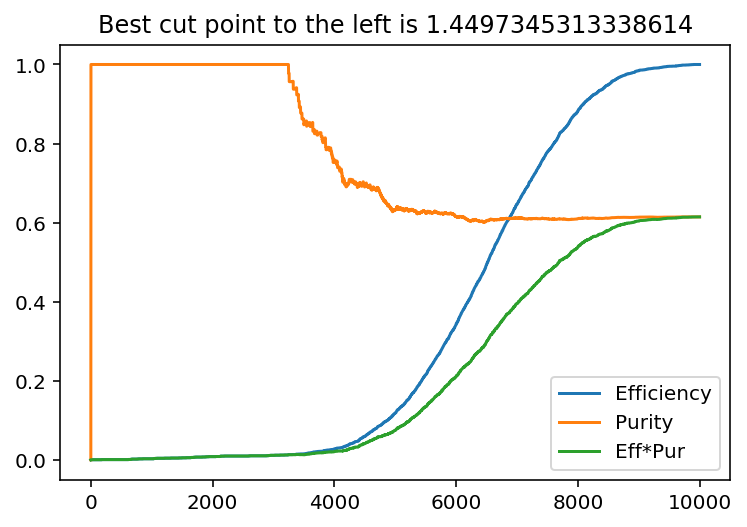

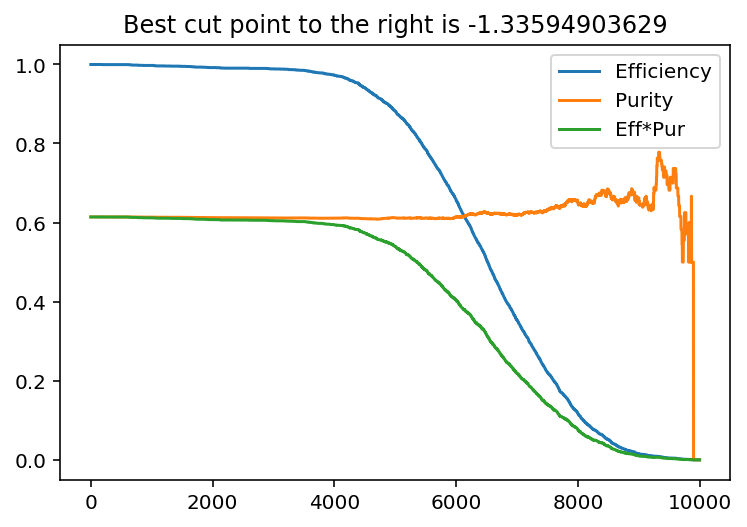

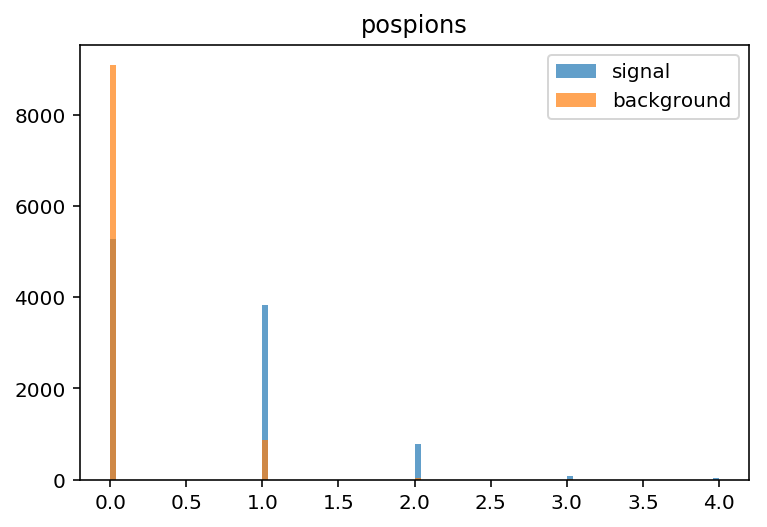

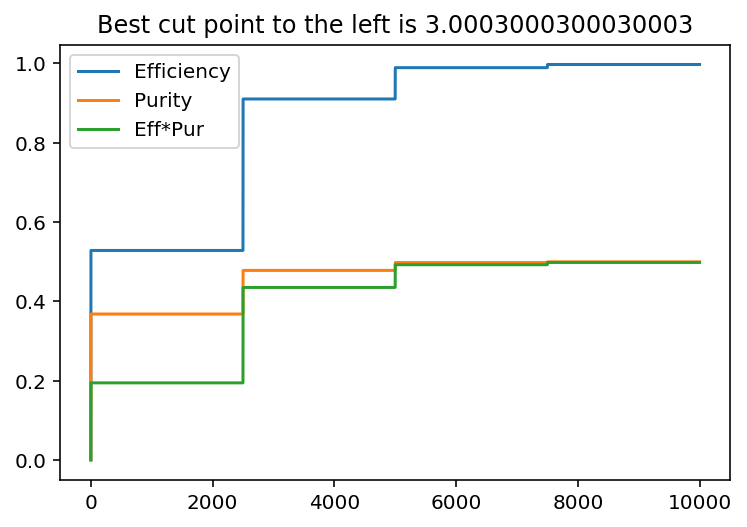

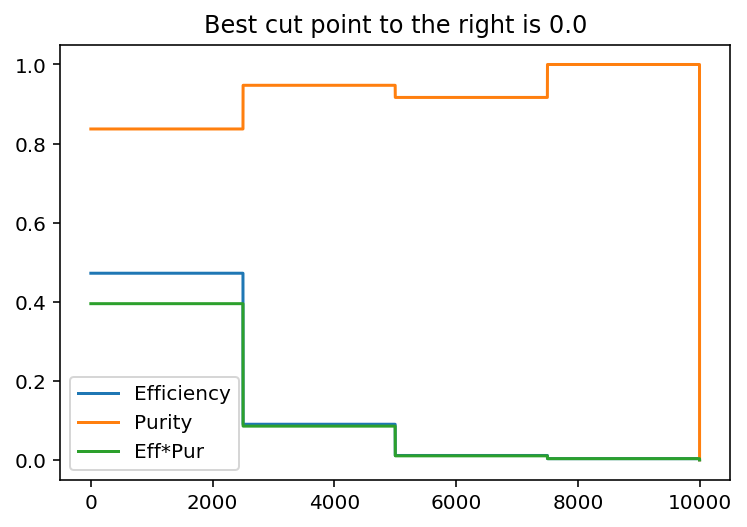

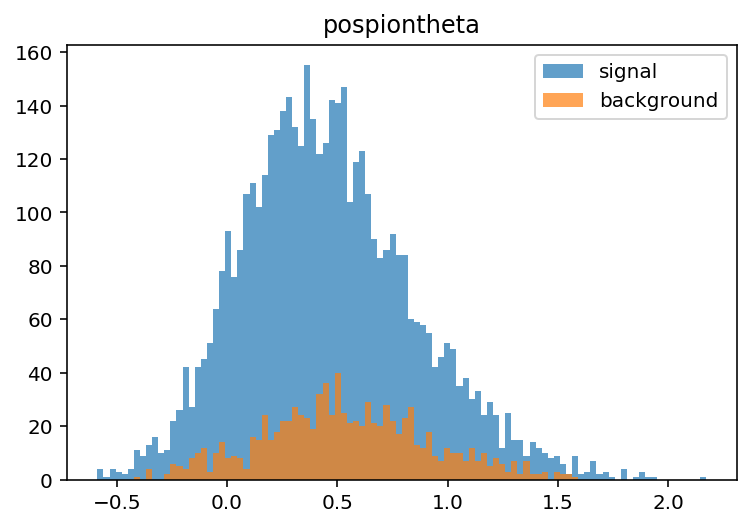

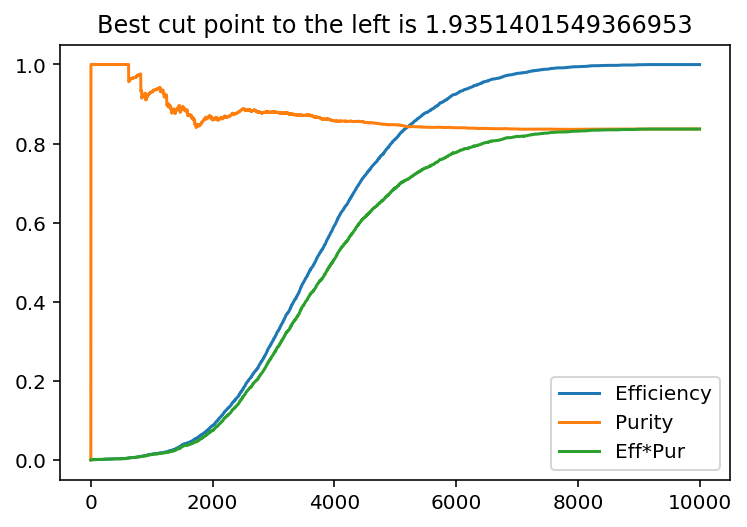

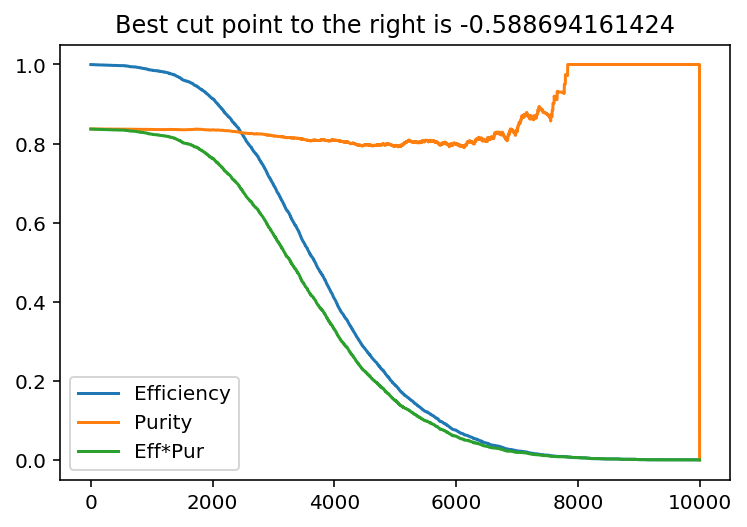

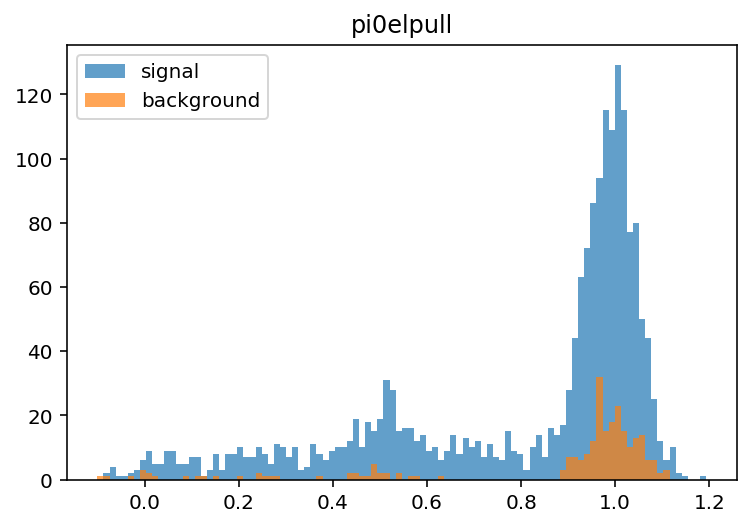

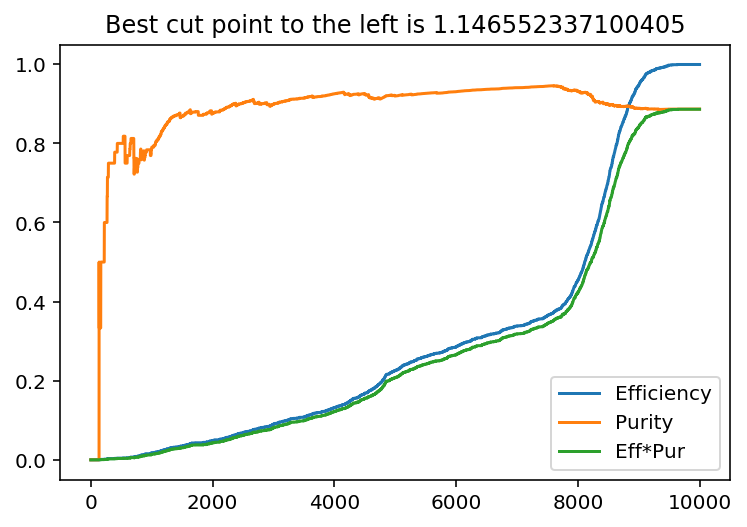

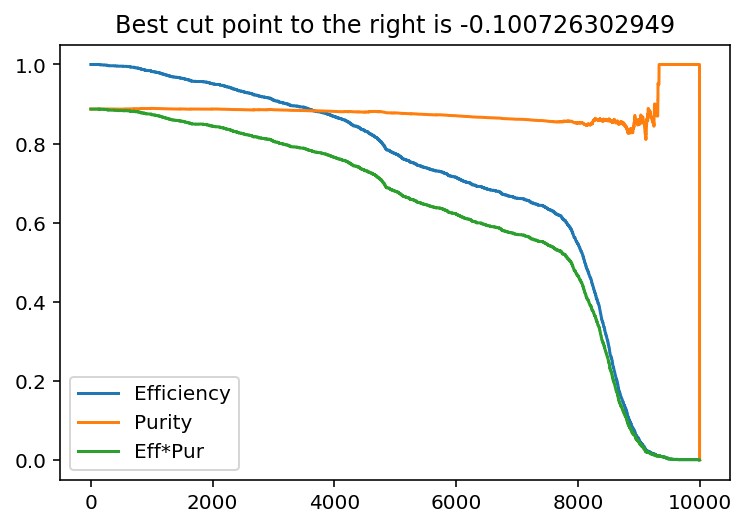

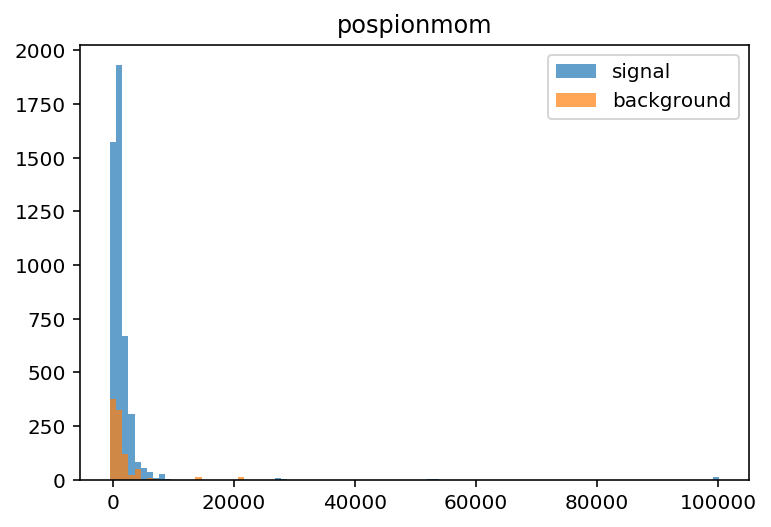

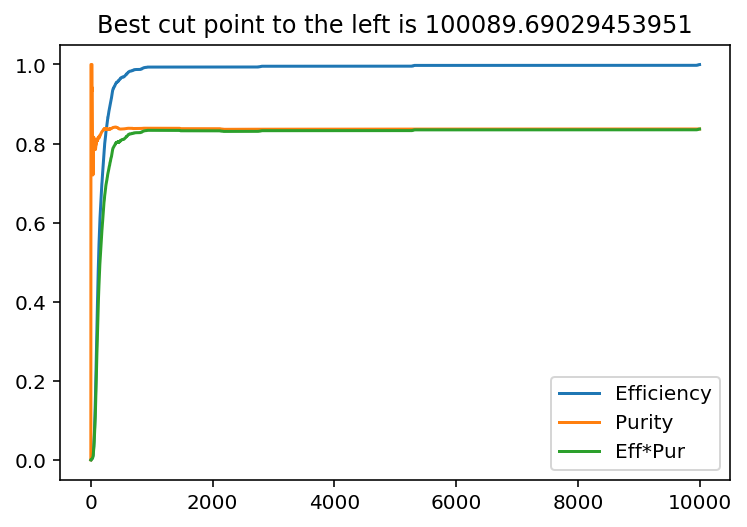

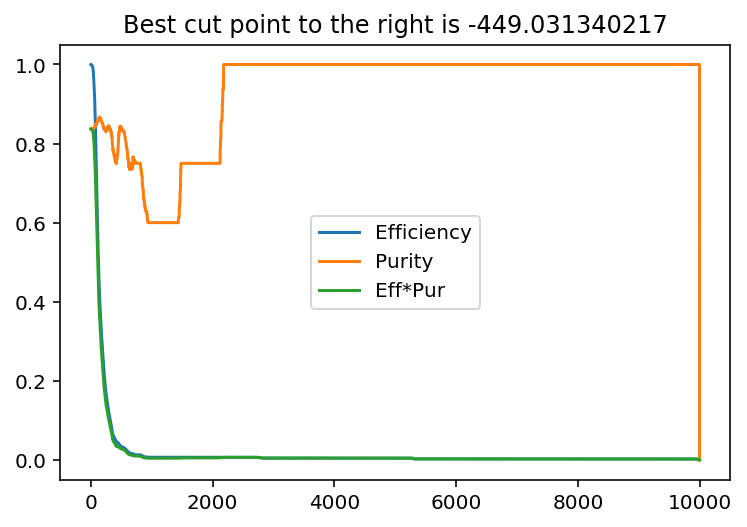

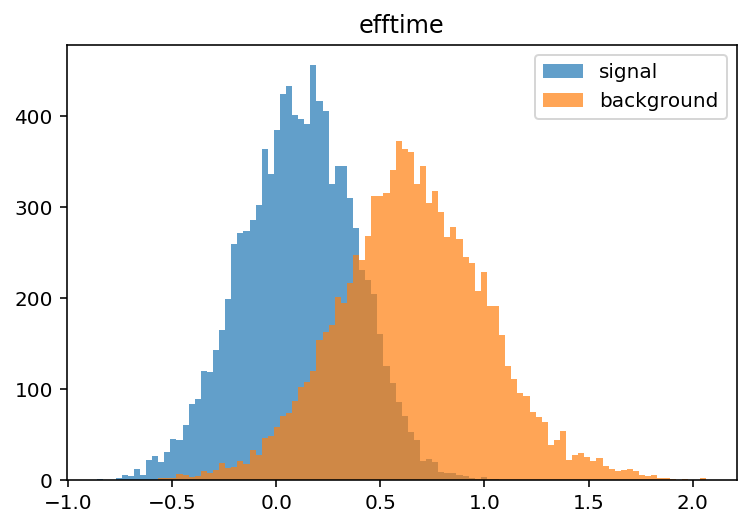

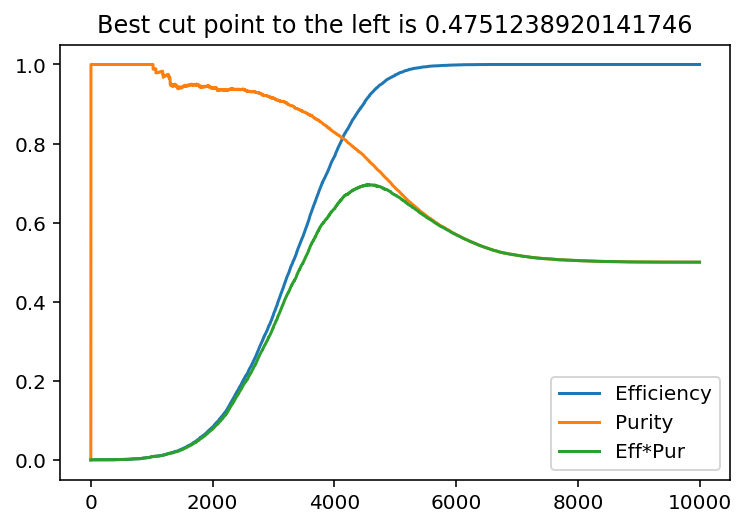

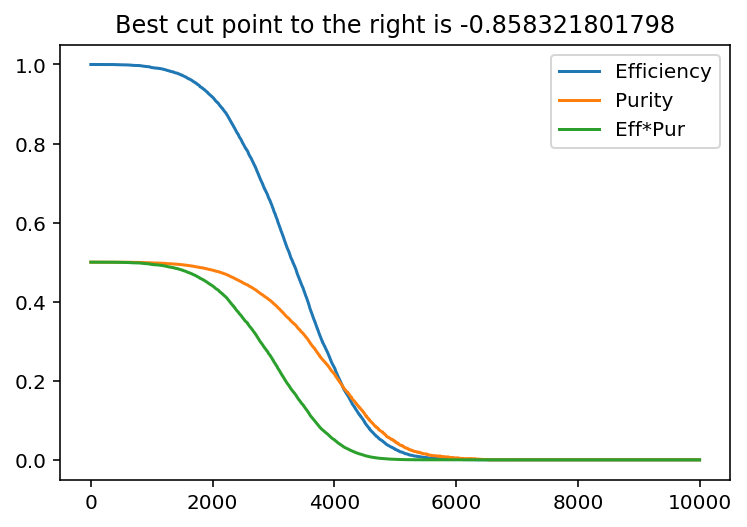

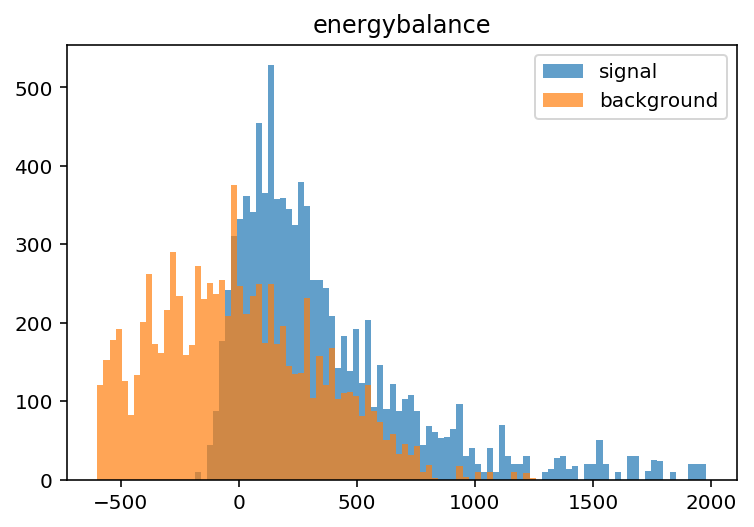

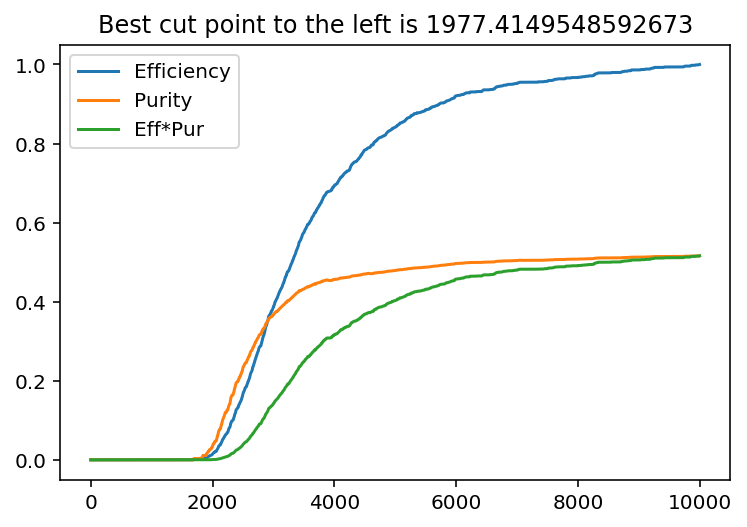

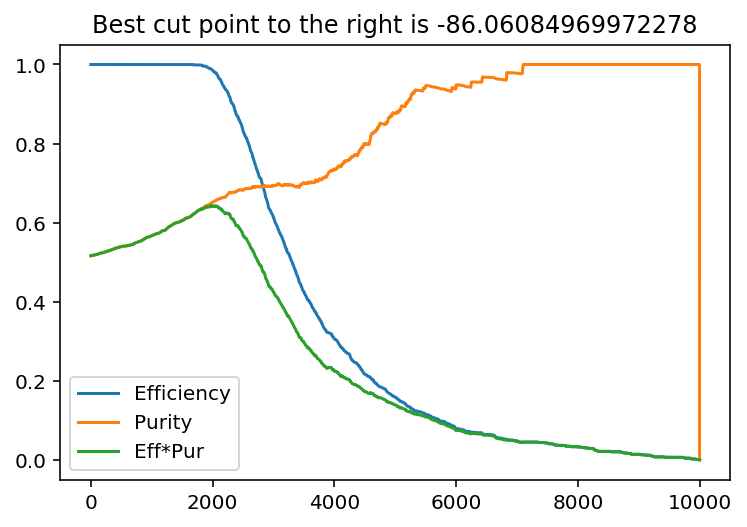

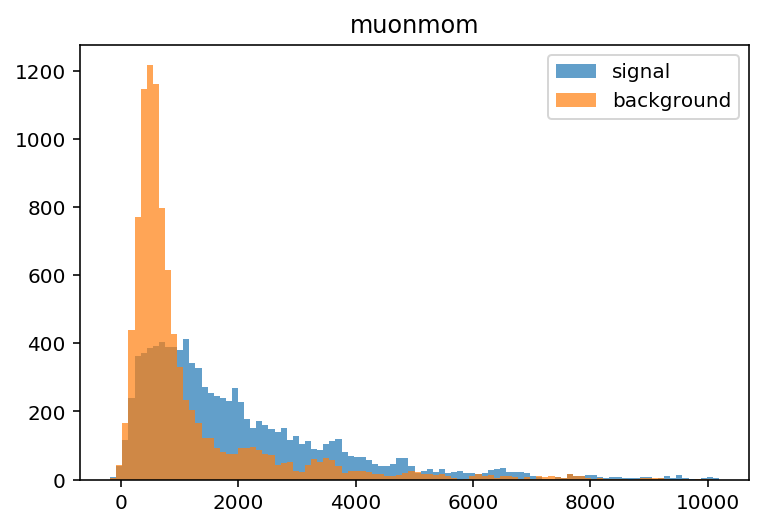

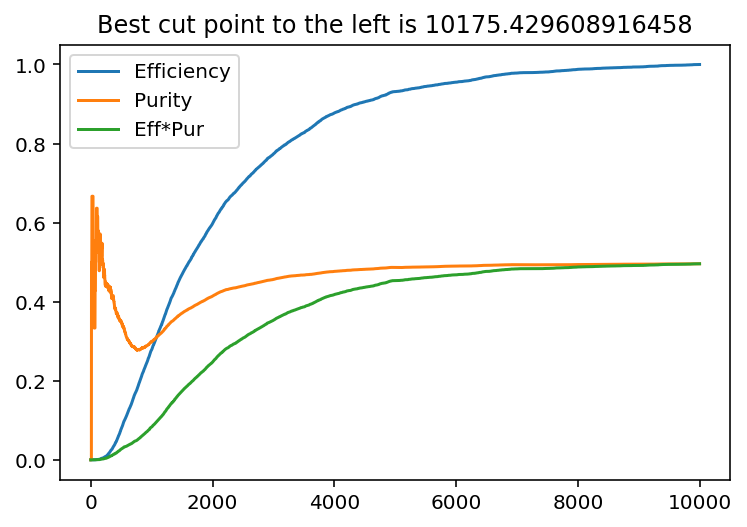

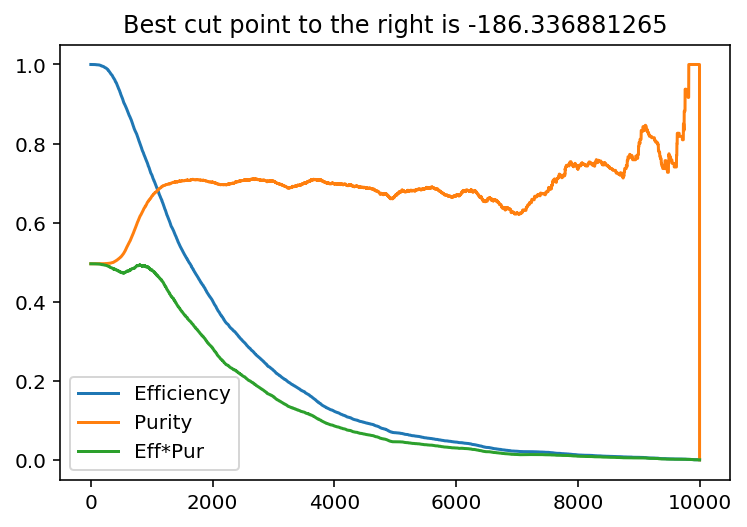

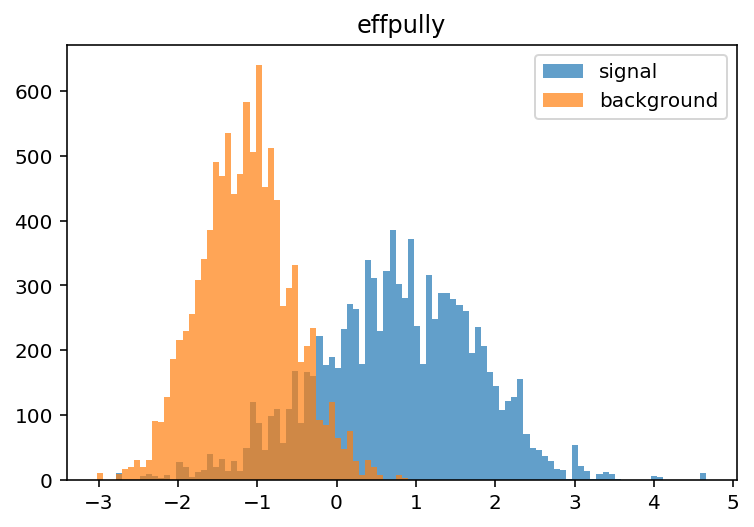

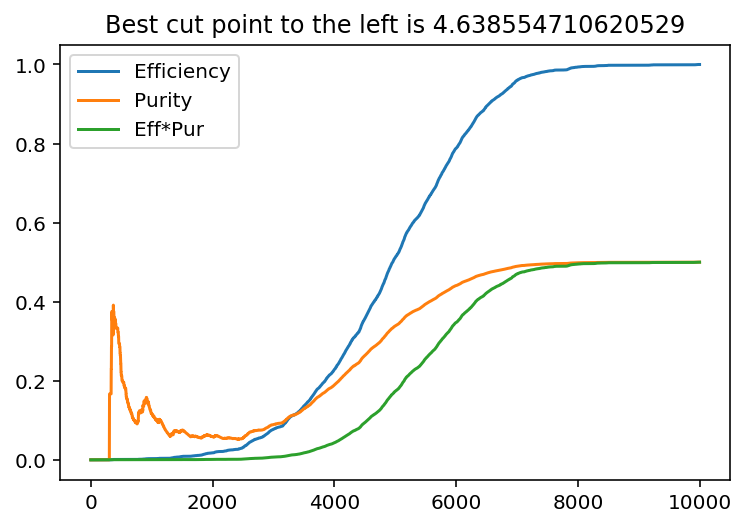

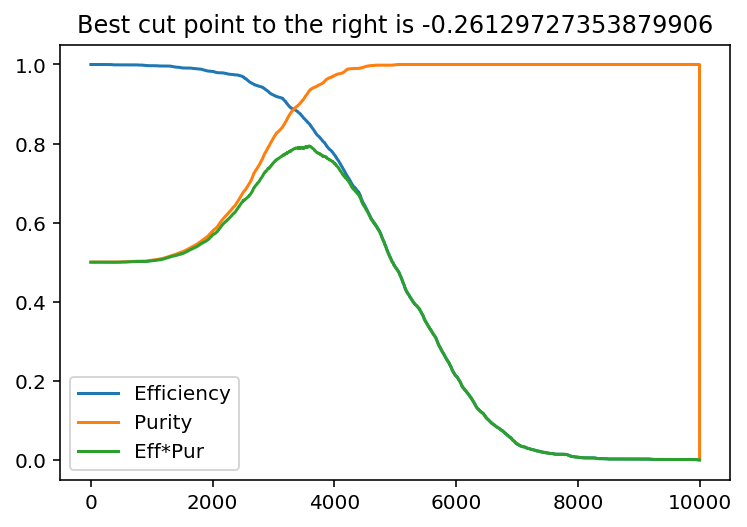

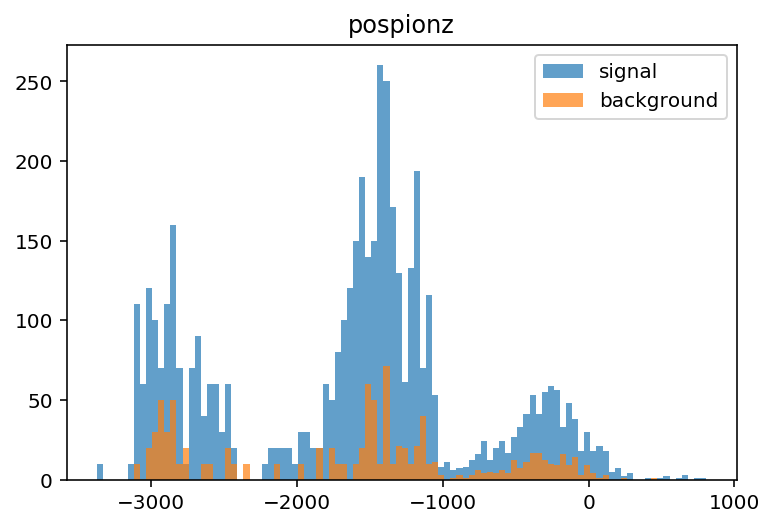

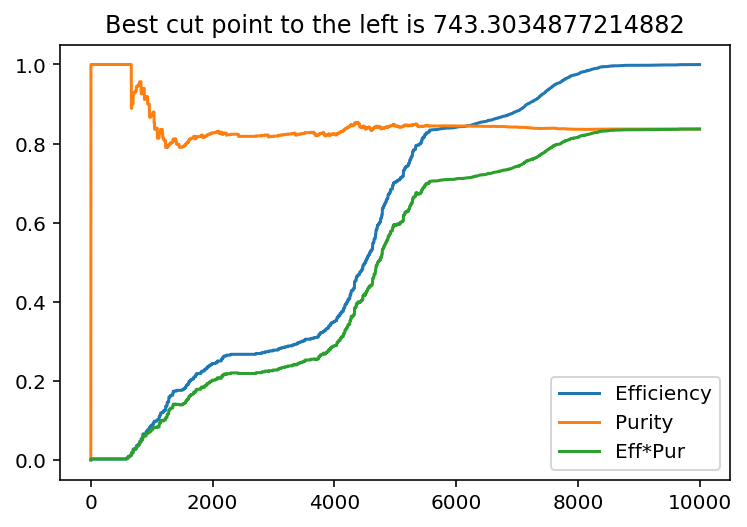

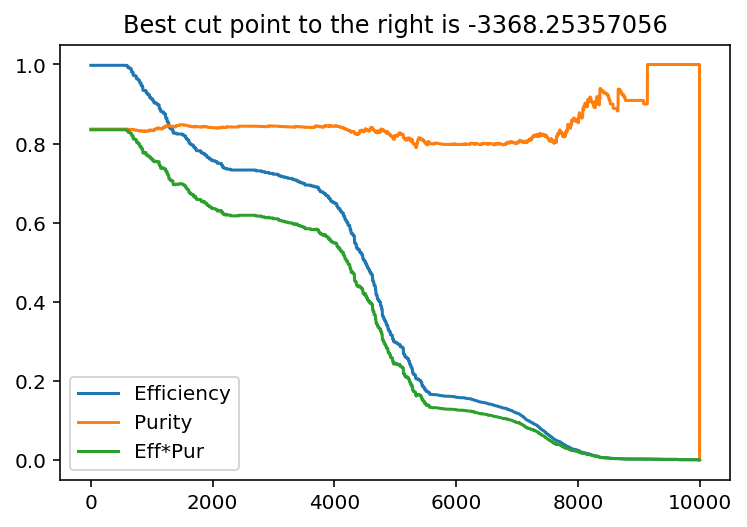

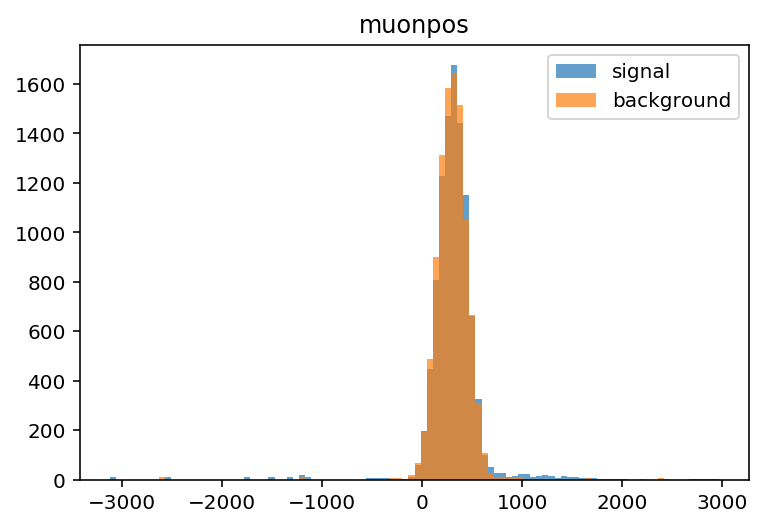

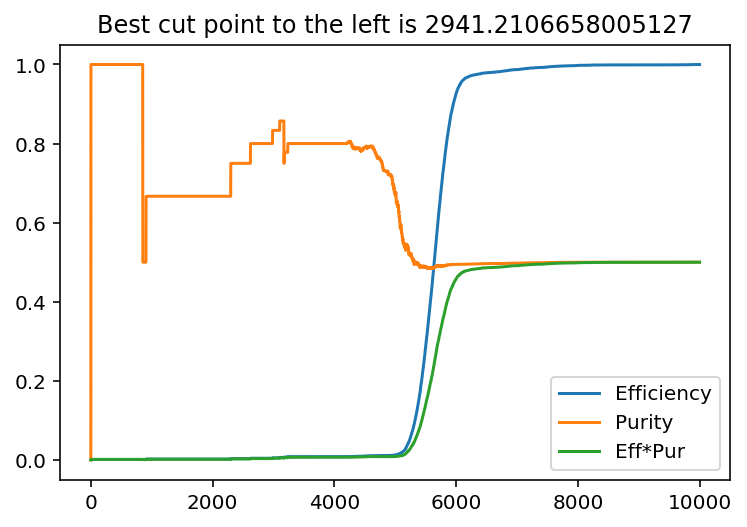

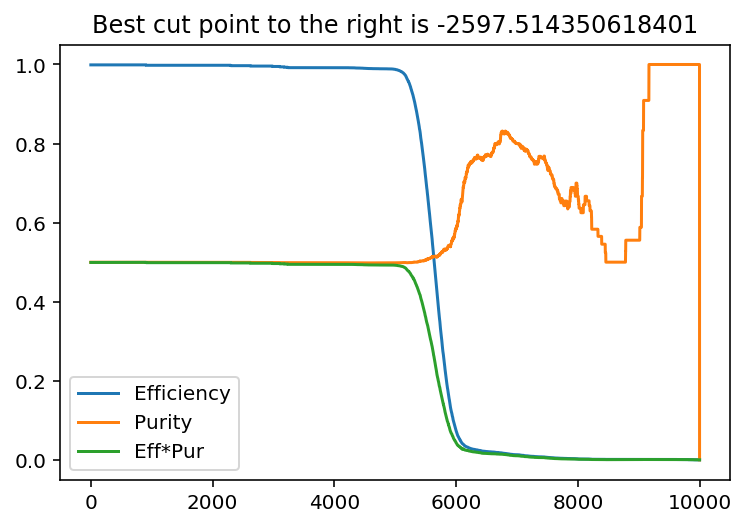

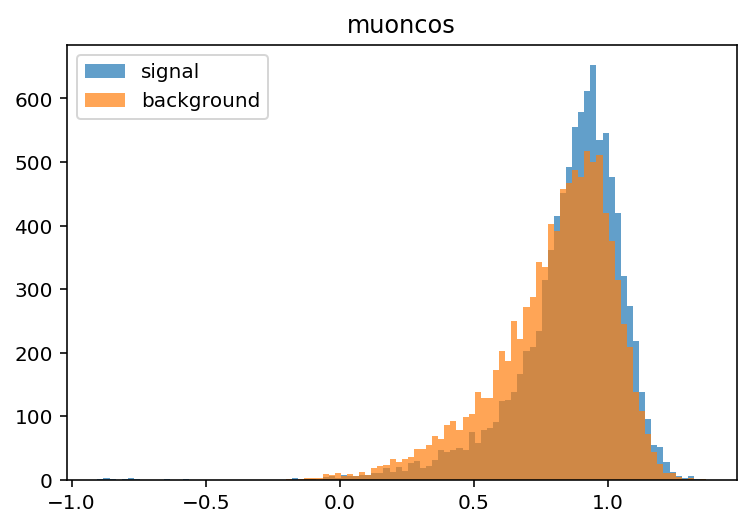

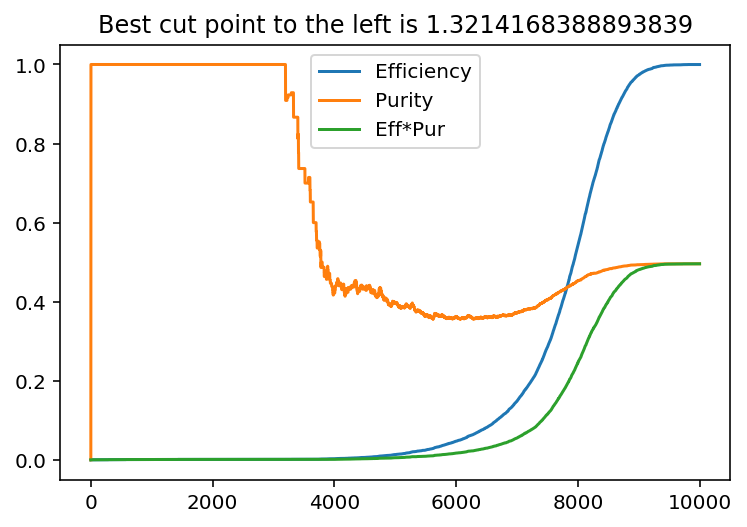

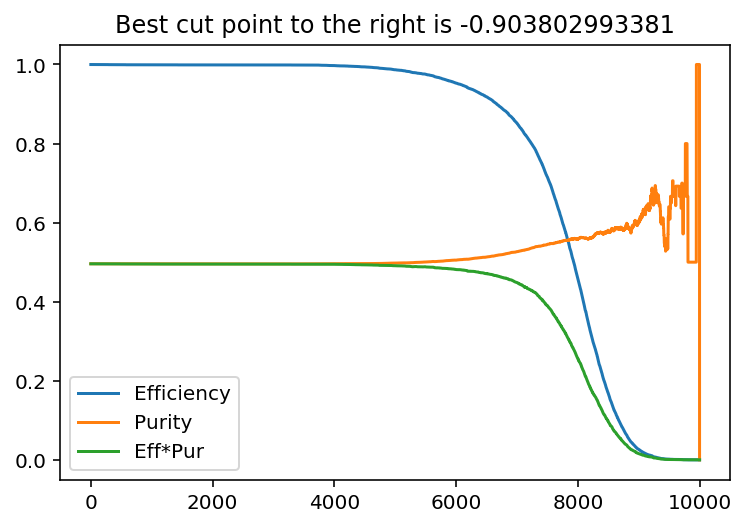

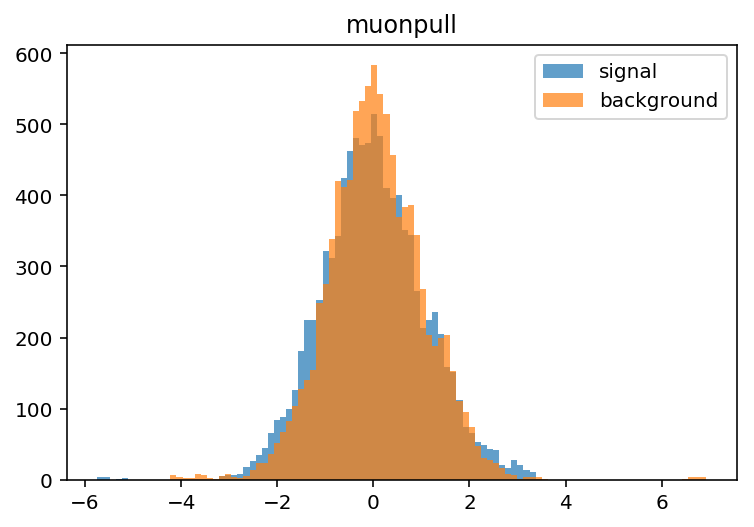

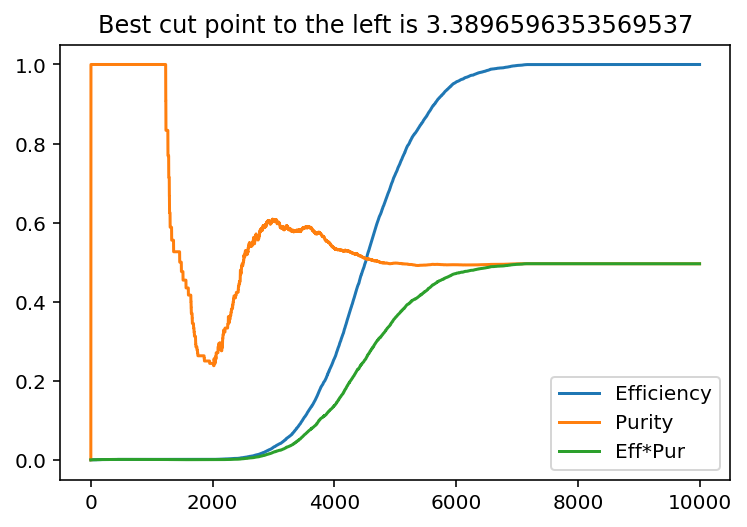

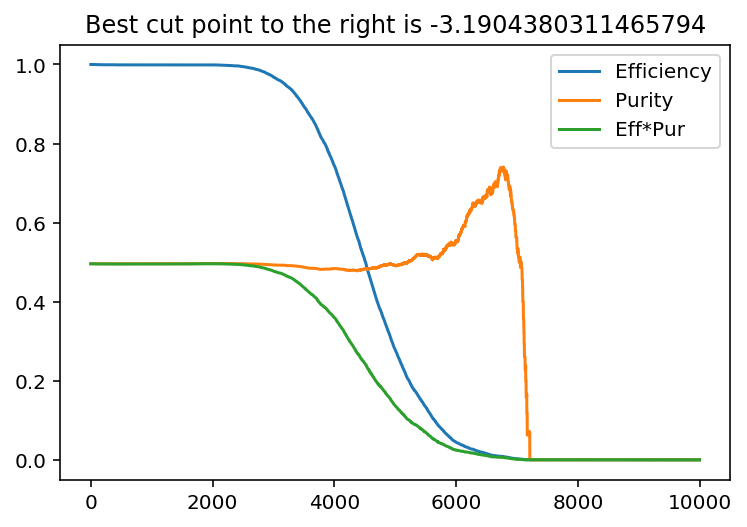

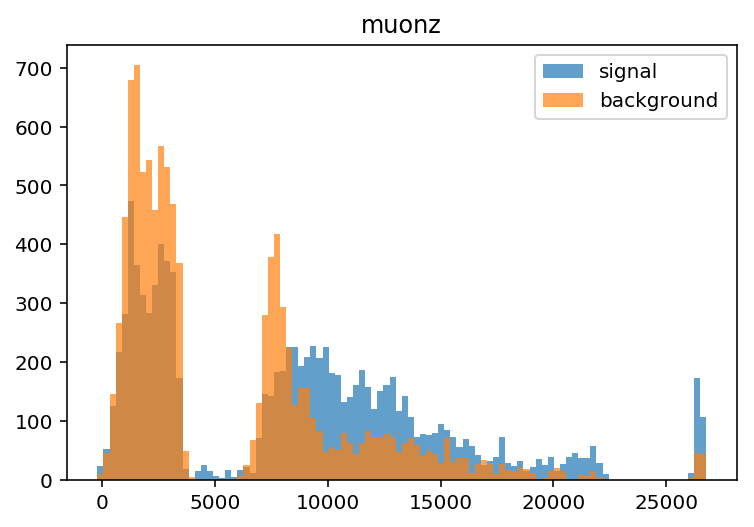

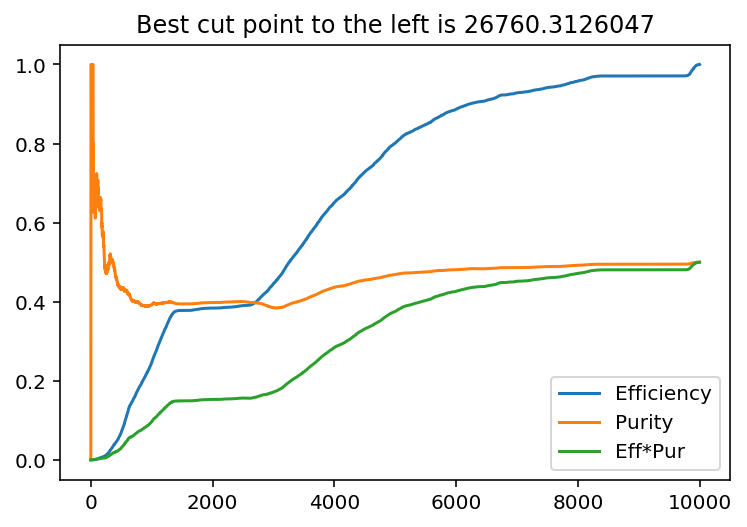

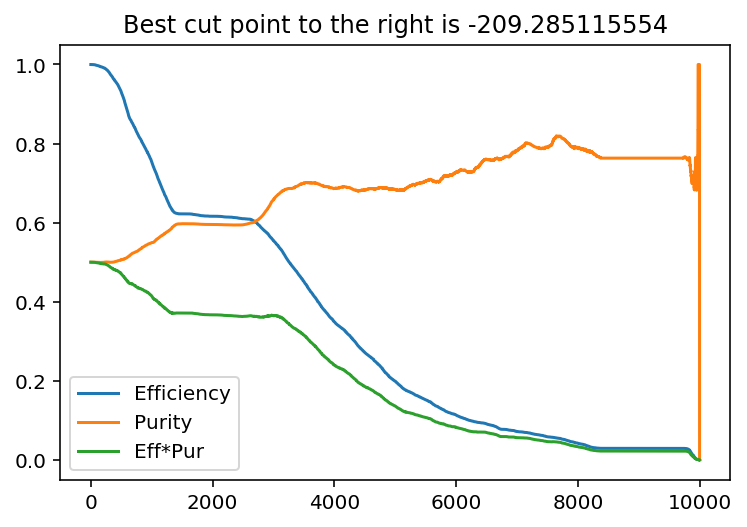

In [4]:
plt.hist(negpionmom[:,0],100,(minimum(negpionmom),maximum(negpionmom)),label='signal',alpha=0.7)      #Histograms of the signal and background data
plt.hist(negpionmom[:,1],100,(minimum(negpionmom),maximum(negpionmom)),label='background',alpha=0.7)
plt.title('negpionmom')
plt.legend()
plt.show()

master_cut(negpionmom)            #Plots of efficiency, purity and the product and the best value to cut on is in the title of each graph

print('')

plt.hist(nue[:,0],100,(minimum(nue),maximum(nue)),label='signal',alpha=0.7)
plt.hist(nue[:,1],100,(minimum(nue),maximum(nue)),label='background',alpha=0.7)
plt.title('nue')
plt.legend()
plt.show()

master_cut(nue)

print('')

plt.hist(effpullx[:,0],100,(minimum(effpullx),maximum(effpullx)),label='signal',alpha=0.7)
plt.hist(effpullx[:,1],100,(minimum(effpullx),maximum(effpullx)),label='background',alpha=0.7)
plt.title('effpullx')
plt.legend()
plt.show()

master_cut(effpullx)

print('')

plt.hist(piontotale[:,0],100,(minimum(piontotale),maximum(piontotale)),label='signal',alpha=0.7)
plt.hist(piontotale[:,1],100,(minimum(piontotale),maximum(piontotale)),label='background',alpha=0.7)
plt.title('piontotale')
plt.legend()
plt.show()

master_cut(piontotale)

print('')

plt.hist(ntracks[:,0],100,(minimum(ntracks),maximum(ntracks)),label='signal',alpha=0.7)
plt.hist(ntracks[:,1],100,(minimum(ntracks),maximum(ntracks)),label='background',alpha=0.7)
plt.title('ntracks')
plt.legend()
plt.show()

master_cut(ntracks)

print('')

plt.hist(fgdcos[:,0],100,(minimum(fgdcos),maximum(fgdcos)),label='signal',alpha=0.7)
plt.hist(fgdcos[:,1],100,(minimum(fgdcos),maximum(fgdcos)),label='background',alpha=0.7)
plt.title('fgdcos')
plt.legend()
plt.show()

master_cut(fgdcos)

print('')

plt.hist(pospions[:,0],100,(minimum(pospions),maximum(pospions)),label='signal',alpha=0.7)
plt.hist(pospions[:,1],100,(minimum(pospions),maximum(pospions)),label='background',alpha=0.7)
plt.title('pospions')
plt.legend()
plt.show()

master_cut(pospions)

print('')

plt.hist(pospiontheta[:,0],100,(minimum(pospiontheta),maximum(pospiontheta)),label='signal',alpha=0.7)
plt.hist(pospiontheta[:,1],100,(minimum(pospiontheta),maximum(pospiontheta)),label='background',alpha=0.7)
plt.title('pospiontheta')
plt.legend()
plt.show()

master_cut(pospiontheta)

print('')

plt.hist(pi0elpull[:,0],100,(minimum(pi0elpull),maximum(pi0elpull)),label='signal',alpha=0.7)
plt.hist(pi0elpull[:,1],100,(minimum(pi0elpull),maximum(pi0elpull)),label='background',alpha=0.7)
plt.title('pi0elpull')
plt.legend()
plt.show()

master_cut(pi0elpull)

print('')

plt.hist(pospionmom[:,0],100,(minimum(pospionmom),maximum(pospionmom)),label='signal',alpha=0.7)
plt.hist(pospionmom[:,1],100,(minimum(pospionmom),maximum(pospionmom)),label='background',alpha=0.7)
plt.title('pospionmom')
plt.legend()
plt.show()

master_cut(pospionmom)

print('')

plt.hist(efftime[:,0],100,(minimum(efftime),maximum(efftime)),label='signal',alpha=0.7)
plt.hist(efftime[:,1],100,(minimum(efftime),maximum(efftime)),label='background',alpha=0.7)
plt.title('efftime')
plt.legend()
plt.show()

master_cut(efftime)

print('')

plt.hist(energybalance[:,0],100,(minimum(energybalance),maximum(energybalance)),label='signal',alpha=0.7)
plt.hist(energybalance[:,1],100,(minimum(energybalance),maximum(energybalance)),label='background',alpha=0.7)
plt.title('energybalance')
plt.legend()
plt.show()

master_cut(energybalance)

print('')

plt.hist(muonmom[:,0],100,(minimum(muonmom),maximum(muonmom)),label='signal',alpha=0.7)
plt.hist(muonmom[:,1],100,(minimum(muonmom),maximum(muonmom)),label='background',alpha=0.7)
plt.title('muonmom')
plt.legend()
plt.show()

master_cut(muonmom)

print('')

plt.hist(effpully[:,0],100,(minimum(effpully),maximum(effpully)),label='signal',alpha=0.7)
plt.hist(effpully[:,1],100,(minimum(effpully),maximum(effpully)),label='background',alpha=0.7)
plt.title('effpully')
plt.legend()
plt.show()

master_cut(effpully)

print('')

plt.hist(pospionz[:,0],100,(minimum(pospionz),maximum(pospionz)),label='signal',alpha=0.7)
plt.hist(pospionz[:,1],100,(minimum(pospionz),maximum(pospionz)),label='background',alpha=0.7)
plt.title('pospionz')
plt.legend()
plt.show()

master_cut(pospionz)

print('')

plt.hist(muonpos[:,0],100,(minimum(muonpos),maximum(muonpos)),label='signal',alpha=0.7)
plt.hist(muonpos[:,1],100,(minimum(muonpos),maximum(muonpos)),label='background',alpha=0.7)
plt.title('muonpos')
plt.legend()
plt.show()

master_cut(muonpos)

print('')

plt.hist(muoncos[:,0],100,(minimum(muoncos),maximum(muoncos)),label='signal',alpha=0.7)
plt.hist(muoncos[:,1],100,(minimum(muoncos),maximum(muoncos)),label='background',alpha=0.7)
plt.title('muoncos')
plt.legend()
plt.show()

master_cut(muoncos)

print('')

plt.hist(muonpull[:,0],100,(minimum(muonpull),maximum(muonpull)),label='signal',alpha=0.7)
plt.hist(muonpull[:,1],100,(minimum(muonpull),maximum(muonpull)),label='background',alpha=0.7)
plt.title('muonpull')
plt.legend()
plt.show()

master_cut(muonpull)

print('')

plt.hist(muonz[:,0],100,(minimum(muonz),maximum(muonz)),label='signal',alpha=0.7)
plt.hist(muonz[:,1],100,(minimum(muonz),maximum(muonz)),label='background',alpha=0.7)
plt.title('muonz')
plt.legend()
plt.show()

master_cut(muonz)

print('')

## Looking ahead ...

Next week we will move onto so-called *multivariate analysis* **(MVA)** techniques in general and *neural networks* in particular. We will closely study the tutorial [Implementing a Neural Network from scratch in Python – an introduction](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/), you may want to read over it, and look at the [associated code](https://github.com/dennybritz/nn-from-scratch/blob/master/ann_classification.py) before the lecture.

## Appendix - information on the variables in the data

### True Variables

True variables should **not** be used as discriminators as in the real world data analysers will not have access to these. They are included in the file to help with training by providing different classifier information.

* event_true : index of the event in the sample, included for easier reference to specific events.
* signal_true : Whether the event is signal (1.0) or background (0.0). 
* reaction_true : Unique identifier that says what the true reaction was: 0-1 : CCQE; 2 : Resonant; >=3 : Deep inelastic

Note: *‘reaction_true’* should be ignored to begin with, but if you have extra time and fancy a challenge, events can be plotted in different histograms according to the reaction type instead of just signal vs background. The true signal definition is defined as **signal_true = (reaction_type == 2)**

### Global Variables

Global variables are saved for every event that occurs. An example is the time that an event occurs in a detector. These can be used as potential discriminators.

* muonmom : Measured muon track momentum
* muoncos : Measured muon track angle with respect to the neutrino beam
* muonpull : ‘Pulls’ are used to decide how much a track looks like a given particle.  This muonpull is calculated by taking the highest momentum track seen in the detector and deciding how much it looks like a muon.
* ntracks : Number of particle tracks observed in one of the detectors.
* piontotale : Total summed energy of pion particles
* energybalance : Pull calculated from difference in energy between muon and pion tracks
* nue : Calculated neutrino energy
* pospions : Number of observed positive pions
* muonpos : Start position of the muon track
* muonz : Length of the muon track
* effpullx : Pull calculated from the horizontal size of the event
* effpully : Pull calculated from the vertical size of the event  
* effpulltime : Pull calculated from the total time of the event

### Track Variables
In some events there will be additional information available when certain conditions are met. For example, if we observe a positively charged pion track in our detector, we can use the track to calculate the pion momentum and angle. However some events will not observe charged pions, so in that case it is impossible to calculate the momentum and angle for a non-existent pion. 

This is reflected in the datafile by the number -999.9. In the event building code example these are replaced by  ‘None’ when read in, so that the following conditional can be used:

** If no negpionmom is saved for this event don’t cut on that variable **

* negpionmom : Momentum of observed negative pion track
* pospionmom : Momentum of observed positive pion track
* pospiontheta : Angle of observed positive pion track
* fgdcos : Related to the angle of the highest momentum track first seen in the event
* pi0elpull : Pull variable to decide whether two electron tracks looked like they came from a neutral pion decay.


 These can be used as potential discriminators.
